In [ ]:
!pip install seaborn
!pip install plotly

# Eksplorasi Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Baca dataset
#data = pd.read_csv('data_lengkap.csv', on_bad_lines='skip')
data = pd.read_csv('data_lengkap.csv')

In [3]:
display(data.head())

,Jenis Tanaman,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu ratarata,produktivitas,luas provinsi,rasio penggunaan lahan
0,Padi,Aceh,1993,1299699.0,323589.0,1627.0,82.00,26.06,40.1651,5848600,5.5328
1,Padi,Aceh,1994,1329536.0,329041.0,1521.0,82.12,26.92,40.4064,5848600,5.6260
2,Padi,Aceh,1995,1368074.0,339253.0,1476.0,82.72,26.27,40.3261,5848600,5.8006
3,Padi,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08,40.7534,5848600,5.9540
4,Padi,Aceh,1997,1382905.0,337561.0,1339.0,82.46,26.31,40.9676,5848600,5.7717


In [4]:
# Atribut data
data.dtypes

Jenis Tanaman              object
Provinsi                   object
Tahun                       int64
Produksi                  float64
Luas Panen                float64
Curah hujan               float64
Kelembapan                float64
Suhu ratarata             float64
produktivitas              object
luas provinsi               int64
rasio penggunaan lahan     object
dtype: object

In [5]:
data.shape

(1300, 11)

In [6]:
# Rataan
data.mean(numeric_only='True')

Tahun            2.005500e+03
Produksi         5.263529e+05
Luas Panen       9.811439e+04
Curah hujan      2.468429e+03
Kelembapan       8.084519e+01
Suhu ratarata    2.688338e+01
luas provinsi    4.820760e+06
dtype: float64

In [7]:
# Menghitung simpangan baku
data.std(numeric_only='True')

Tahun            7.502886e+00
Produksi         1.145224e+06
Luas Panen       1.878881e+05
Curah hujan      1.016643e+03
Kelembapan       4.963180e+00
Suhu ratarata    1.170428e+00
luas provinsi    2.822042e+06
dtype: float64

In [8]:
data.min(numeric_only='True')

Tahun              1993.00
Produksi              1.00
Luas Panen            1.00
Curah hujan         222.50
Kelembapan           54.20
Suhu ratarata        22.19
luas provinsi    827000.00
dtype: float64

In [9]:
data.max(numeric_only='True')

Tahun               2018.00
Produksi         9193676.00
Luas Panen       1014351.00
Curah hujan         5522.00
Kelembapan            90.60
Suhu ratarata         29.85
luas provinsi    9159200.00
dtype: float64

In [10]:
#data.mode()

In [11]:
#data.quantile(numeric_only='True', 0.75)

In [12]:
data.median(numeric_only='True')

Tahun               2005.500
Produksi           53430.000
Luas Panen          9374.500
Curah hujan         2381.100
Kelembapan            82.375
Suhu ratarata         26.800
luas provinsi    4557350.000
dtype: float64

In [13]:
data['Provinsi'].value_counts()

Provinsi
Aceh                    130
Sumatera Utara          130
Sumatera Barat          130
Riau                    130
Jambi                   130
Sumatera Selatan        130
Bengkulu                130
Lampung                 130
Kep. Bangka Belitung    130
Kep. Riau               130
Name: count, dtype: int64

In [14]:
# Statistik deskriptif untuk variabel numerik
numerik_data = data.select_dtypes(include=['int64', 'float64'])
numerik_data.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu ratarata,luas provinsi
count,1300.000000,1.188000e+03,1.188000e+03,1175.000000,1040.000000,1185.000000,1.300000e+03
mean,2005.500000,5.263529e+05,9.811439e+04,2468.429064,80.845192,26.883376,4.820760e+06
std,7.502886,1.145224e+06,1.878881e+05,1016.642708,4.963180,1.170428,2.822042e+06
min,1993.000000,1.000000e+00,1.000000e+00,222.500000,54.200000,22.190000,8.270000e+05
25%,1999.000000,1.327525e+04,3.072500e+03,1789.000000,78.850000,26.310000,1.991900e+06
50%,2005.500000,5.343000e+04,9.374500e+03,2381.100000,82.375000,26.800000,4.557350e+06
75%,2012.000000,4.133790e+05,8.648125e+04,3083.000000,84.000000,27.300000,7.246100e+06
max,2018.000000,9.193676e+06,1.014351e+06,5522.000000,90.600000,29.850000,9.159200e+06


# Praproses

In [15]:
import plotly.express as px

In [16]:
# atribut data
print(data.dtypes)
print(data.shape)

Jenis Tanaman              object
Provinsi                   object
Tahun                       int64
Produksi                  float64
Luas Panen                float64
Curah hujan               float64
Kelembapan                float64
Suhu ratarata             float64
produktivitas              object
luas provinsi               int64
rasio penggunaan lahan     object
dtype: object
(1300, 11)


In [17]:
# Check for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types


(Jenis Tanaman               0
 Provinsi                    0
 Tahun                       0
 Produksi                  112
 Luas Panen                112
 Curah hujan               125
 Kelembapan                260
 Suhu ratarata             115
 produktivitas               0
 luas provinsi               0
 rasio penggunaan lahan      0
 dtype: int64,
 Jenis Tanaman              object
 Provinsi                   object
 Tahun                       int64
 Produksi                  float64
 Luas Panen                float64
 Curah hujan               float64
 Kelembapan                float64
 Suhu ratarata             float64
 produktivitas              object
 luas provinsi               int64
 rasio penggunaan lahan     object
 dtype: object)

In [18]:
# Normalize the province names and check for inconsistencies
data['Provinsi'] = data['Provinsi'].str.title().str.strip()

# Display unique province names to check for inconsistencies
unique_provinces = data['Provinsi'].unique()
unique_provinces


array(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', 'Lampung', 'Kep. Bangka Belitung',
       'Kep. Riau'], dtype=object)

In [19]:
# Descriptive statistics for the dataset
print(data.info())
descriptive_stats = data.describe()
descriptive_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Jenis Tanaman           1300 non-null   object 
 1   Provinsi                1300 non-null   object 
 2   Tahun                   1300 non-null   int64  
 3   Produksi                1188 non-null   float64
 4   Luas Panen              1188 non-null   float64
 5   Curah hujan             1175 non-null   float64
 6   Kelembapan              1040 non-null   float64
 7   Suhu ratarata           1185 non-null   float64
 8   produktivitas           1300 non-null   object 
 9   luas provinsi           1300 non-null   int64  
 10  rasio penggunaan lahan  1300 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 111.8+ KB
None


,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu ratarata,luas provinsi
count,1300.000000,1.188000e+03,1.188000e+03,1175.000000,1040.000000,1185.000000,1.300000e+03
mean,2005.500000,5.263529e+05,9.811439e+04,2468.429064,80.845192,26.883376,4.820760e+06
std,7.502886,1.145224e+06,1.878881e+05,1016.642708,4.963180,1.170428,2.822042e+06
min,1993.000000,1.000000e+00,1.000000e+00,222.500000,54.200000,22.190000,8.270000e+05
25%,1999.000000,1.327525e+04,3.072500e+03,1789.000000,78.850000,26.310000,1.991900e+06
50%,2005.500000,5.343000e+04,9.374500e+03,2381.100000,82.375000,26.800000,4.557350e+06
75%,2012.000000,4.133790e+05,8.648125e+04,3083.000000,84.000000,27.300000,7.246100e+06
max,2018.000000,9.193676e+06,1.014351e+06,5522.000000,90.600000,29.850000,9.159200e+06


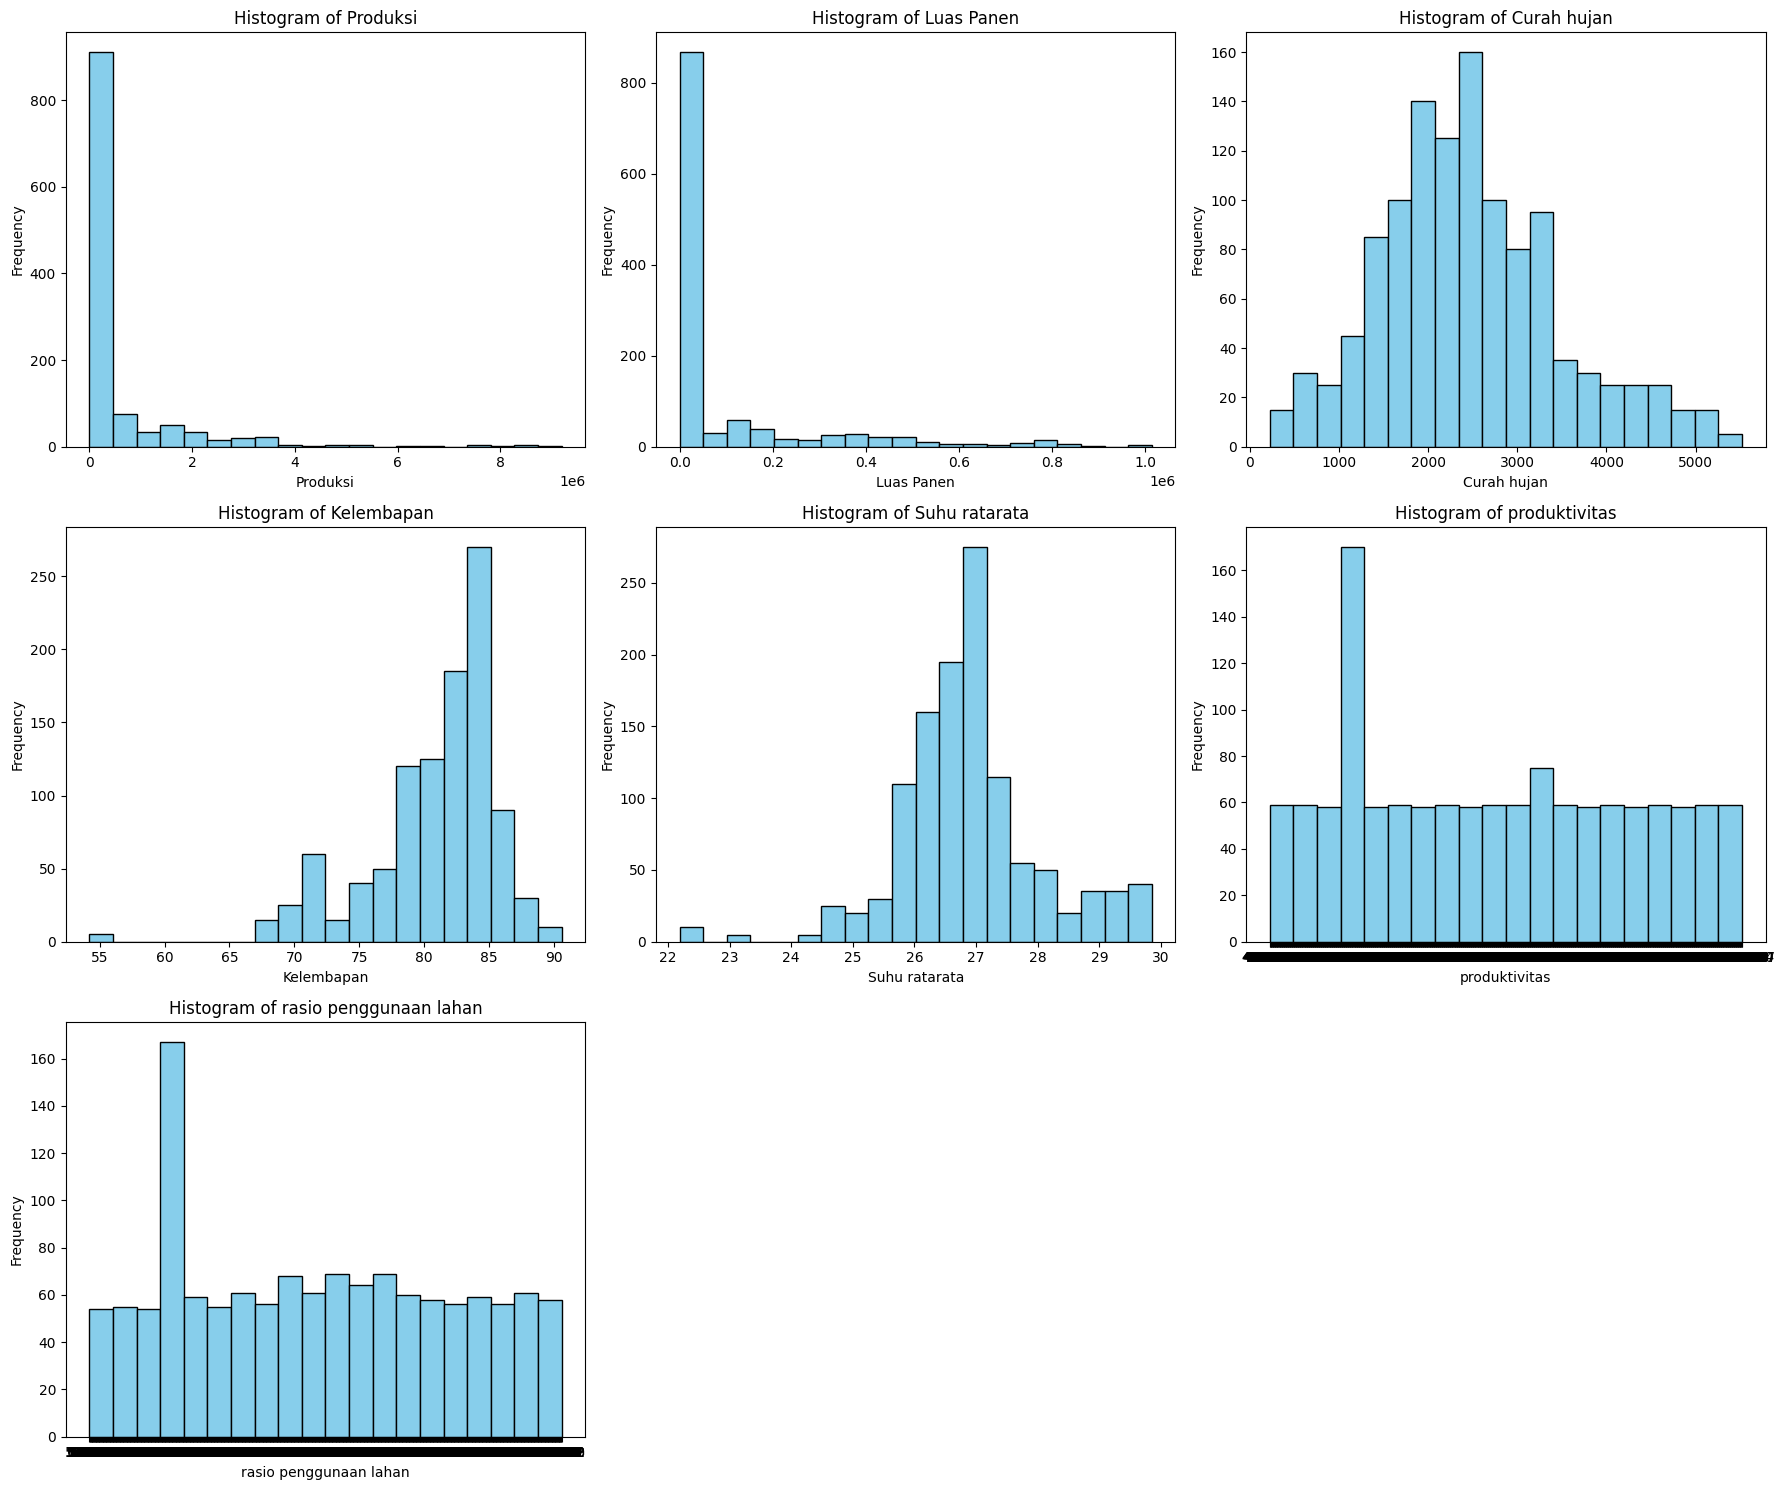

In [20]:
# visualisasi
# Set up the figure and axes for a grid of histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Define columns for histograms
columns = ['Produksi', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu ratarata', 'produktivitas',
           'rasio penggunaan lahan']

# Create histograms for each column
for i, col in enumerate(columns):
    axes[i].hist(data[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



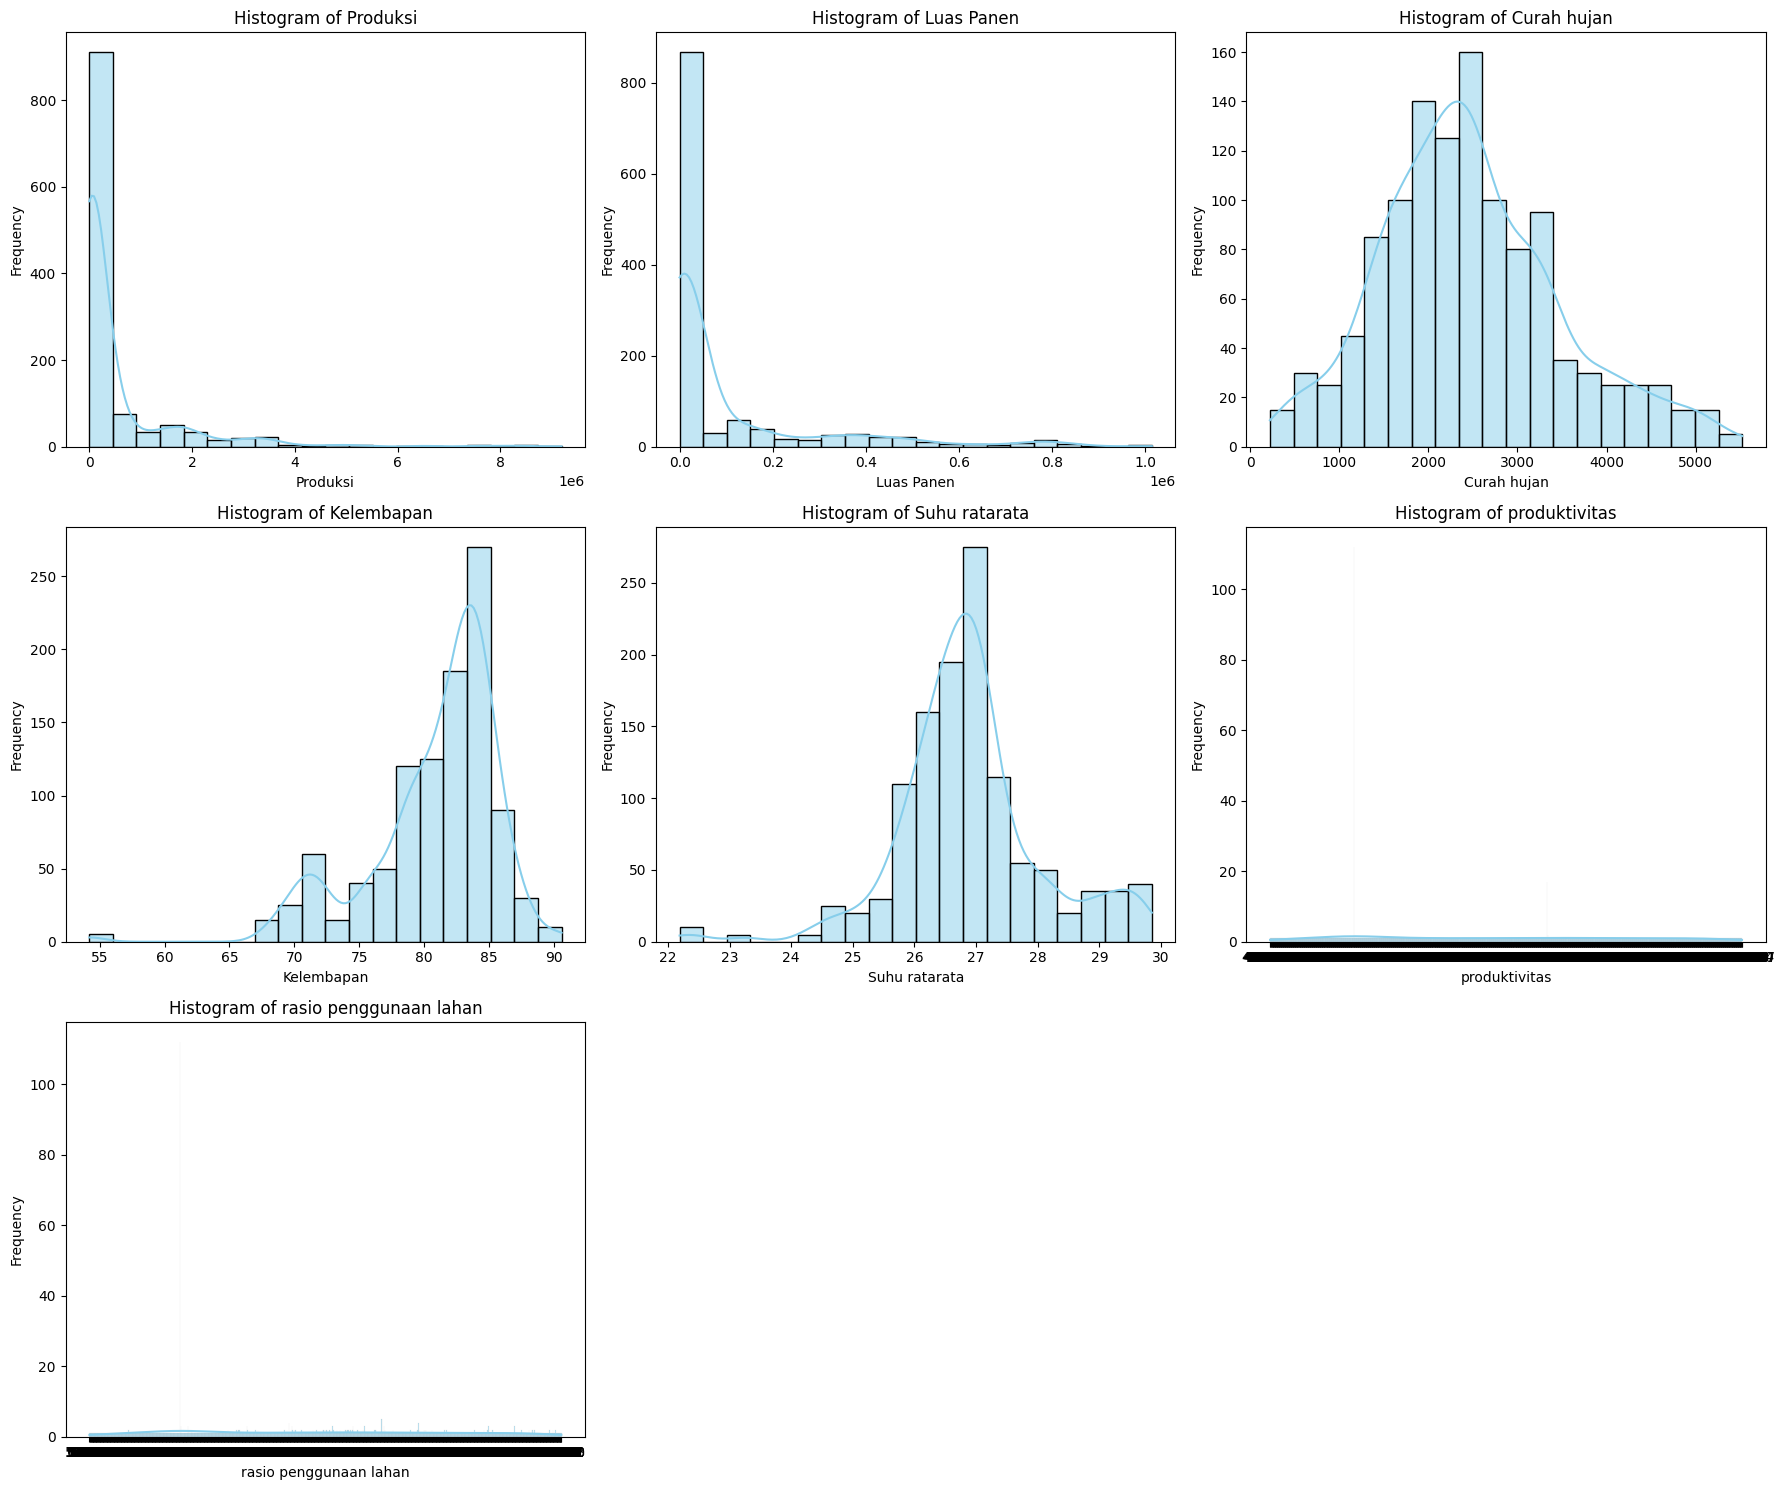

In [21]:
# Set up the figure for a grid of histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Create histograms using seaborn for each column
for i, col in enumerate(columns):
    sns.histplot(data[col], bins=20, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


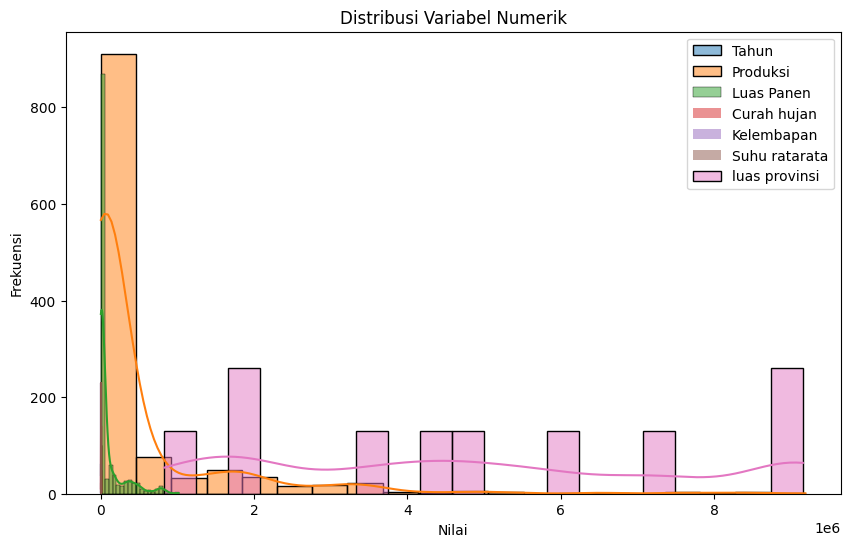

In [22]:
# Visualisasi distribusi variabel numerik
plt.figure(figsize=(10, 6))
for column in numerik_data.columns:
    sns.histplot(numerik_data[column], bins=20, kde=True, label=column)
plt.title('Distribusi Variabel Numerik')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

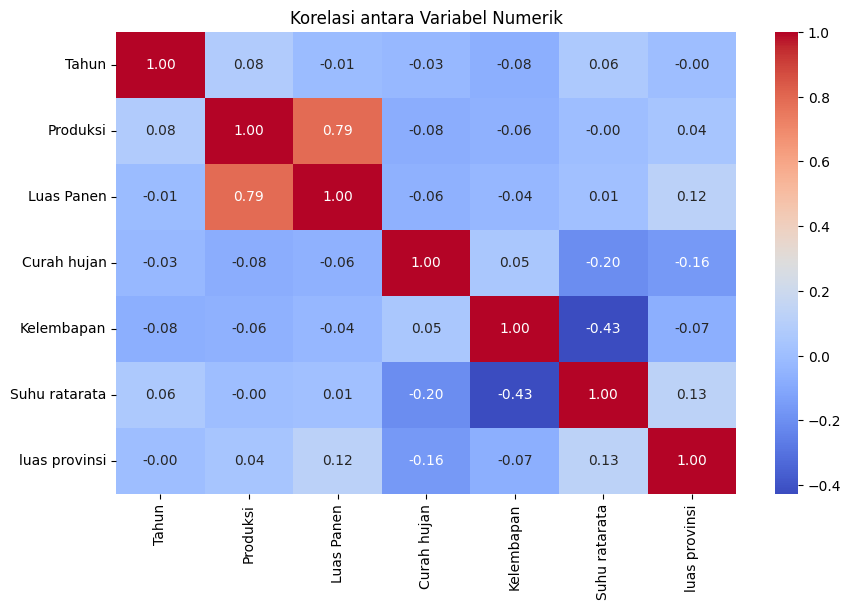

In [23]:
# Visualisasi korelasi antara variabel numerik sebagai heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerik_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Variabel Numerik')
plt.show()

In [24]:
#reading the database
fig = px.bar(data, x='Jenis Tanaman', y='Produksi', color='Provinsi')

#showing the plot
fig.show()

In [25]:
#reading the database
fig = px.bar(data, x='Provinsi', y='Produksi', color='Jenis Tanaman')

#showing the plot
fig.show()

In [26]:
#reading the database
fig = px.line(data, y='Produksi', color='Provinsi')

#showing the plot
fig.show()

# Rf coba

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Misalnya, jika dataset Anda adalah dalam bentuk CSV dan tersedia secara online:
df = pd.read_csv

# Jika Anda mengunggah dataset ke Google Colab:
# df = pd.read_csv("nama_file.csv")

# Cetak lima baris pertama dataset untuk memastikan bahwa data dimuat dengan benar
print(df.head())